In [12]:
!pip install numpy pandas seaborn matplotlib

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Questions to explore:

Which columns have missing values?

-Age and Cabin

What are the data types?

-Age: float and Cabin: object

Which columns are categorical vs numerical?

-Age, Fare, Pcarch and SibSp

-name, Pclass, Embrake, cabin and ticket

In [17]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


How many passengers survived?

- 0 represent died and 1 represent survived so total passenger survied is equal to 342

What's the average age?
mean

In [22]:
df['Age'].isnull().sum()


np.int64(177)

In [24]:
df['Age'].describe()


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: >

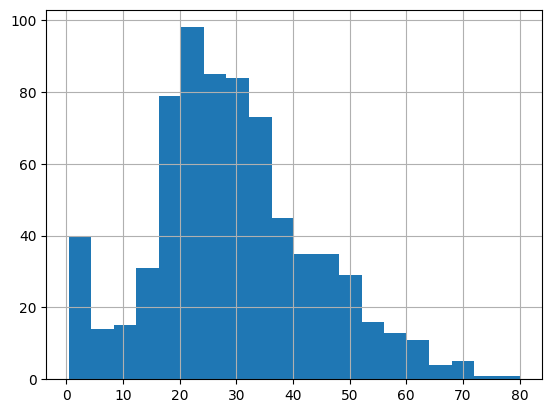

In [25]:
df['Age'].hist(bins=20)

In [26]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [27]:
df['Age'].isnull().sum()


np.int64(0)

In [28]:
mean_age = df['Age'].mean()
print("Mean Age:", mean_age)


Mean Age: 29.69911764705882


<Axes: xlabel='Survived', ylabel='count'>

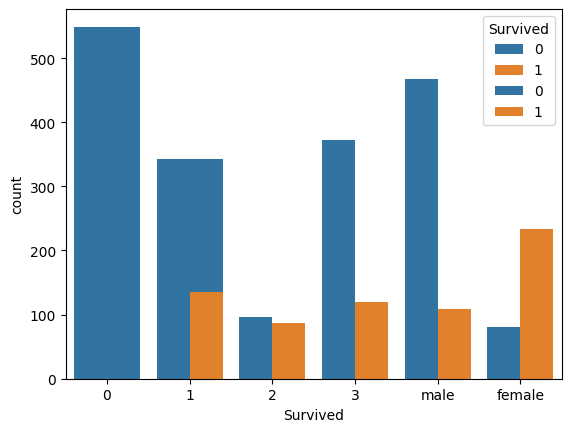

In [29]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

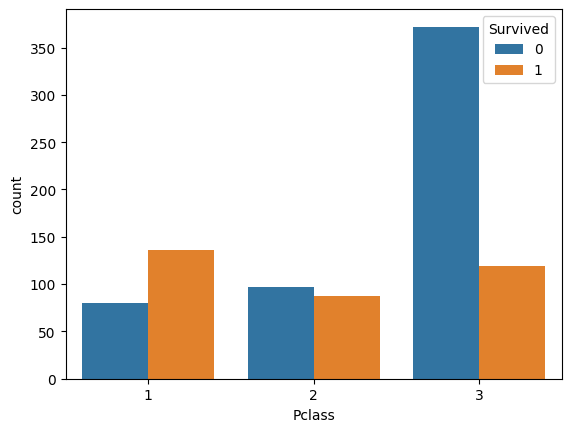

In [30]:
sns.countplot(x='Pclass', hue='Survived', data=df)


<Axes: xlabel='Sex', ylabel='count'>

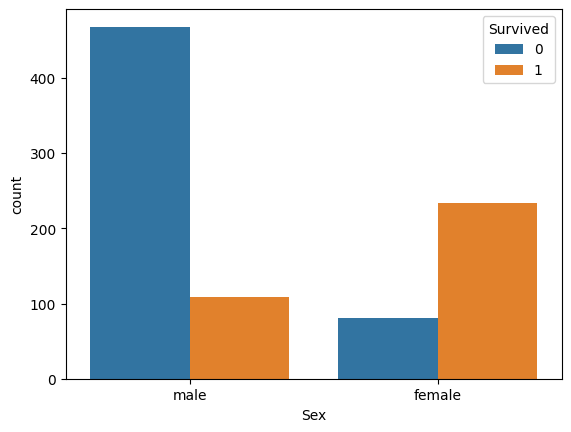

In [31]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [32]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)  # Too many missing values

/tmp/ipython-input-32-432541493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [35]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [37]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [38]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [39]:
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [40]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [45]:
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,Miss,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,Mr,1,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,Mr,1,1


In [44]:
df['IsAlone'] = 1  # Default is alone
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0


In [47]:
df.drop(['Name', 'Ticket',], axis=1, inplace=True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])         # female:0, male:1
df['Embarked'] = le.fit_transform(df['Embarked'])  # C:0, Q:1, S:2 (example)
df['Title'] = le.fit_transform(df['Title'])     # Mr:0, Miss:1, etc.


In [50]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,2,2,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,3,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,1,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,2,1,1


In [51]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


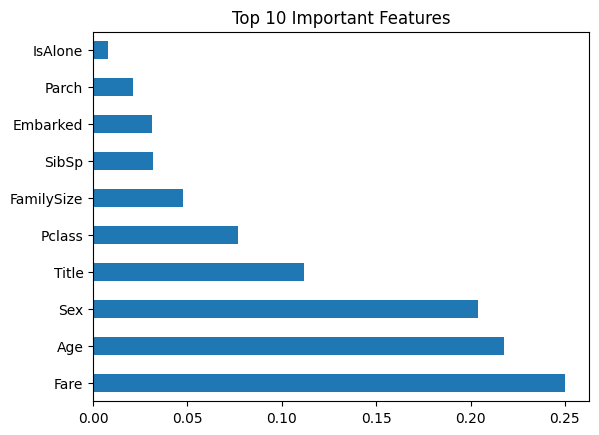

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



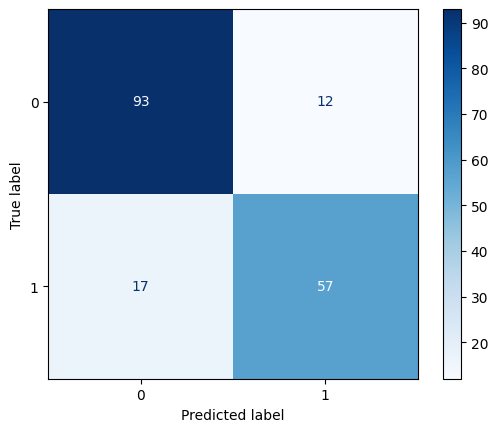

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


Logistic Regression Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



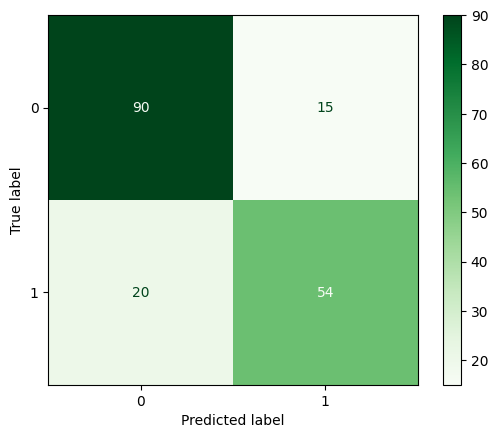

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_log_pred = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_log_pred))
print("Classification Report:\n", classification_report(y_test, y_log_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='Greens')


Decision Tree Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



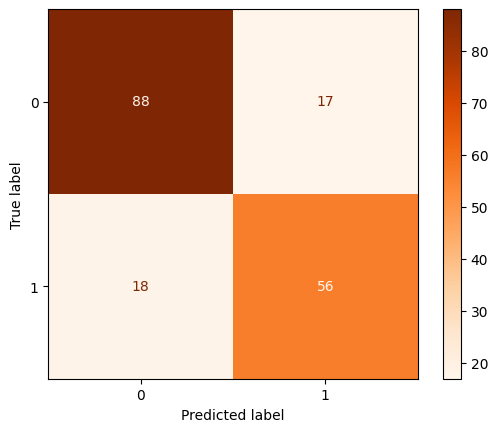

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_dt_pred = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Oranges')


KNN Accuracy: 0.7430167597765364
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       105
           1       0.73      0.59      0.66        74

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179



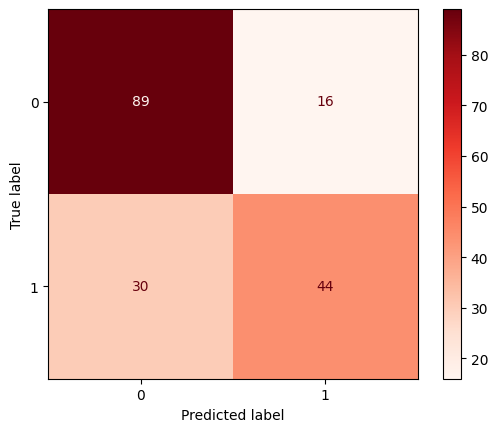

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_knn_pred = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("Classification Report:\n", classification_report(y_test, y_knn_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Reds')


# Best model is Random Forest with Accuracy: 0.8379888268156425

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Use best estimator
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_best_pred))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 0.8212290502793296


In [68]:
import joblib

joblib.dump(best_model, 'titanic_random_forest_model.pkl')


['titanic_random_forest_model.pkl']

In [69]:
model = joblib.load('titanic_random_forest_model.pkl')


In [70]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age, inplace=True)

/tmp/ipython-input-73-2785793927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(mean_age, inplace=True)


In [75]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [77]:
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-77-1752682892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)


In [78]:
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [79]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr


In [80]:
df_test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [82]:
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')


In [83]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [84]:
df_test['IsAlone'] = 1  # Default is alone
df_test.loc[df['FamilySize'] > 1, 'IsAlone'] = 0


In [86]:
df_test.drop(['Name', 'Ticket',], axis=1, inplace=True)

KeyError: "['Name', 'Ticket'] not found in axis"

In [94]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,2,2,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,3,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,1,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,2,1,1


In [95]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,0
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,0
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,1
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,0
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,1


In [87]:
df_test.drop([ 'Cabin'], axis=1, inplace=True)

In [93]:
X = df.drop(['Survived', 'PassengerId'], axis=1)


In [96]:
# Make sure the test data has the same features (same names and order)
df_test = df_test[X_train.columns]


In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_test['Sex'] = le.fit_transform(df_test['Sex'])         # female:0, male:1
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])  # C:0, Q:1, S:2 (example)
df_test['Title'] = le.fit_transform(df_test['Title'])     # Mr:0, Miss:1, etc.

/tmp/ipython-input-98-1368371888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sex'] = le.fit_transform(df_test['Sex'])         # female:0, male:1
/tmp/ipython-input-98-1368371888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Embarked'] = le.fit_transform(df_test['Embarked'])  # C:0, Q:1, S:2 (example)
/tmp/ipython-input-98-1368371888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [99]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,1,34.5,0,0,7.8292,1,2,1,0
1,3,0,47.0,1,0,7.0000,2,3,2,0
2,2,1,62.0,0,0,9.6875,1,2,1,1
3,3,1,27.0,0,0,8.6625,2,2,1,0
4,3,0,22.0,1,1,12.2875,2,3,3,1


In [100]:
df_test = df_test[X_train.columns]  # ensure same columns and order
predictions = best_model.predict(df_test)


In [103]:
original_test = pd.read_csv('test.csv')  # adjust path if needed


In [104]:
submission = pd.DataFrame({
    'PassengerId': original_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
